# Inteligencia Artificial
## TB1

## Problema: Laberinto para ciegos

Representamos un mapa como un arreglo, donde cada índice define una coordenada (según residuo y módulo con el largo y ancho del mapa). Los valores de cada índice representan si dicho espacio en el mapa es el inicio, la celda objetivo, o una pared.

In [ ]:
!pip install gtts

La clase Mapa nos permite generar uno dado el ancho y largo correspondiente e inicializarlo de manera aleatoria con objetos y paredes. Además, en caso tengamos un mapa ya creado, es posible asignarlo a una variable de clase Mapa, enviándolo como parámetro.
Sus funciones principales son:


1.   ***getCoordenadas(self,num):*** esta función recibe un número que debe ser menor a la variable N, la cual representa la multiplicación del largo con el ancho del mapa. Este número se mapeará y se calculará su índice, el cual será retornado.
2.   ***isCorner(self,n1,n2):*** dadas dos coordenadas en el mapa, la función retorna *True* si una es esquina de la otra.
3.   ***isBordeMapa(self,x):*** dada una coordenada en el mapa, la función retorna *True* si es un borde del mapa correspondiente.
4.   ***dist(self,num):*** retorna la distancia de la coordenada dada hasta la posición final.
5.   ***getAdyacentes(self,num):*** esta función retorna todas las posiciones adyacentes transitables dada una posición en el mapa.



In [ ]:
import random
import math
from gtts import gTTS
from IPython.display import Audio
from matplotlib import pyplot as plt
from matplotlib import colors

class Mapa():
  def __init__(self, ancho, largo, posIni = 0, posFin = 0, l_mapa = None):
    self.ancho = ancho #..... Ancho (X)
    self.largo = largo #..... Largo (Y)
    self.l_mapa = l_mapa #... Arreglo 'mapa'
    self.l_mapaoriginal = l_mapa
    self.posIni = posIni #.......... Inicializa la celda 'inicio'
    self.posFin = posFin #.......... Inicializa la celda 'final'
    self.inParedes = [] #.... Conjunto de índices donde hay paredes
    self.inObjetos = [] #.... Conjunto de índices donde hay objetos
    self.N = ancho*largo
    if not l_mapa: #Si no se ingresó mapa, se crea uno de manera aleatoria
      self.l_mapa = ['.' for _ in range(self.N)]
      k_paredes = random.randint(self.N//5,self.N//3) # Para que haya un número medio de paredes
      for pos in range(k_paredes):
        k = random.randint(0,self.N-1)
        while k==self.posIni or k == self.posFin or self.l_mapa[k] != '.':
          k = random.randint(0,self.N-1)
        self.inParedes.append(k)
        self.l_mapa[k] = 'X'
      k_objetos = random.randint(1,5) # Para que haya un número pequeño de objetos
      for pos in range(k_objetos):
        k = random.randint(0,self.N-1)
        while k==self.posIni or k == self.posFin or self.l_mapa[k] != '.':
          k = random.randint(0,self.N-1)
        self.inObjetos.append(k)
        self.l_mapa[k] = 'O'
      while self.posIni == self.posFin or not self.isBordeMapa(self.posFin) or not self.isBordeMapa(self.posIni) or self.l_mapa[self.posIni]!='.'or self.l_mapa[self.posFin]!='.':
        self.posIni = random.randint(0,N-1)
        self.posFin = random.randint(0,N-1)
      self.l_mapa[self.posIni] = 'I'
      self.l_mapa[self.posFin] = 'F'
    else:
      #Leer el mapa ingresado como arreglo
      for i in range(self.N):
        if self.l_mapa[i]=='X':
          self.inParedes.append(i)
        if self.l_mapa[i]=='O':
          self.l_mapa[i] = '.'
        if self.l_mapa[i]=='I':
          self.l_mapa[i] = '.'
        if self.l_mapa[i]=='F':
          self.l_mapa[i] = '.'
    self.l_mapaoriginal = self.l_mapa.copy()
  #Función 'Mostrar' auxiliar
  def aux_Mostrar(self): #Cuando se pase a Anaconda, hacer que imprima
    res = ""
    for i in range(self.N):
      res += self.l_mapa[i]
      if (i+1) % self.ancho == 0:
        res += '\n'
    print(res)
  
  # Traducir el índice (num) a coordenadas (x,y) (con eje x=+i,y=-j)
  def getCoordenadas(self, num):
    if num > self.N:
      return None
    return (int(num%self.ancho),int(num/self.ancho))
  # Traducir las coordenadas (x,y) al índice (num)
  def getIndice(self,tupla):
    x = tupla[0]
    y = tupla[1]
    return y*self.ancho + x
  
  #Retorna Si es que la celda n1 es esquina de n2, o viceversa
  def isCorner(self,n1,n2):
    return (n1 - self.ancho - 1 == n2 or n1 - self.ancho + 1 == n2 or n1 + self.ancho - 1 == n2 or n1 + self.ancho + 1 == n2)
  
  def isBordeMapa(self,x):
    return (x < self.ancho or x >=(self.N)-self.ancho or x % self.ancho == 0 or (x+1)% self.ancho == 0)

  # Retornar la distancia de (num) a la Posicion Final
  def dist(self,num):
    x,y = self.getCoordenadas(num)
    xf,yf = self.getCoordenadas(self.posFin)
    return 10*(abs(x-xf) + abs(y-yf))

  # Retornar mapa con números del 0 al 4
  def convertmapa(self):
    fmap = []
    nmap = []
    cont = 0
    for j in range(self.ancho):
      for i in range(self.largo):
        cont+=1
        if self.l_mapaoriginal[j*self.largo+i] == 'I':
          nmap.append(0)
        if self.l_mapaoriginal[j*self.largo+i] == 'O':
          nmap.append(1)
        if self.l_mapaoriginal[j*self.largo+i] == '.':
          nmap.append(2)
        if self.l_mapaoriginal[j*self.largo+i] == 'X':
          nmap.append(3)
        if self.l_mapaoriginal[j*self.largo+i] == 'F':
          nmap.append(4)
        if cont == self.ancho:
          fmap.append(nmap)
          cont = 0
          nmap = []
    return fmap

  # Retorna lista de índices de las celdas adyacente (válidas)
  def getAdyacentes(self,num):
    x,y = self.getCoordenadas(num)
    lista = set()
    # Pasar por su alrededor i:(-1,0,1), j:(-1,0,1)
    for i in range(-1,2):
      for j in range(-1,2):
        x_n = x + i
        y_n = y + j
        # Saltar si la nueva coordenada sale de los límites del mapa
        if x_n < 0 or y_n < 0 or x_n >= self.ancho or y_n >= self.largo:
          continue
        if x_n == x and y_n == y:
          continue
        num_celda = self.getIndice((x_n, y_n))
        if self.l_mapa[num_celda] != 'X':
          lista.add(num_celda)
    return lista

In [ ]:
width = 32
height = 16
ini = 0
fin = width*height-1
aux = Mapa(width,height,ini,fin)

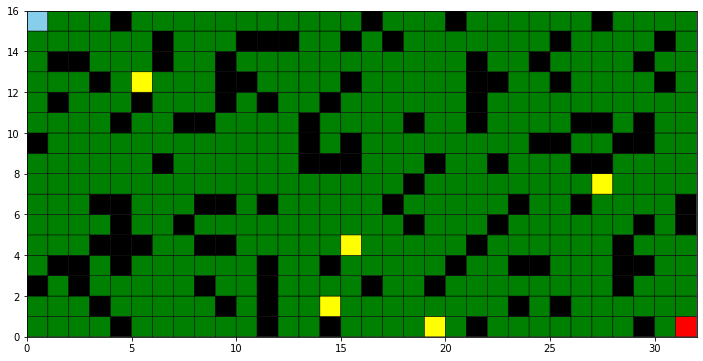

In [ ]:
def Vermapa(data):
  cmap = colors.ListedColormap(['Skyblue','Yellow','Green','Black','Red'])
  plt.figure(figsize=(12,6))
  plt.pcolor(data[::-1],cmap=cmap,edgecolors='k', linewidths=0.5)
  plt.show()
Vermapa(aux.convertmapa())

In [ ]:
print(aux.inParedes)

[373, 338, 418, 43, 99, 291, 292, 237, 93, 386, 412, 133, 297, 88, 314, 42, 167, 118, 142, 168, 361, 491, 435, 149, 192, 360, 111, 126, 70, 385, 137, 49, 216, 105, 243, 501, 327, 230, 342, 27, 246, 16, 424, 296, 299, 388, 395, 181, 239, 106, 121, 351, 274, 221, 189, 117, 73, 319, 250, 173, 416, 404, 457, 413, 494, 408, 66, 139, 44, 427, 509, 164, 305, 324, 186, 65, 205, 178, 444, 451, 20, 311, 398, 484, 356, 473, 407, 471, 355, 187, 57, 85, 129, 207, 220, 432, 459, 38, 62, 238, 4, 357, 380, 47, 349, 251, 217]


In [ ]:
print(aux.inObjetos)

[462, 101, 499, 283, 367]


In [ ]:
y,x = aux.getCoordenadas(20)
print((x,y))

(0, 20)


In [ ]:
aux.getAdyacentes(41)

{8, 9, 10, 40, 72, 74}

In [ ]:
aux.isCorner(10,0)

False

## Algoritmos:

### A*:

In [ ]:
def A_Star(laberinto):
  posini = laberinto.posIni
  posfin = laberinto.posFin
  openList = []
  closeList = []
  openList.append(posini)
  fslist = [0 for i in range(laberinto.N)]
  padres = [-1 for i in range(laberinto.N)]
  endNode = None
  FinalCost = 0
  fslist[posini] = laberinto.dist(posini)
  while True:
    if openList == []:
      print("No se puede llegar al destino")
      quit()
      exit(True)
    n = min(openList, key=lambda x: fslist[x])
    openList.remove(n)
    closeList.append(n)
    if n == posfin:
      endNode = n
      FinalCost = fslist[n]
      break
    ady = laberinto.getAdyacentes(n)
    gs = fslist[n] - laberinto.dist(n)
    for i in ady:
      s = 10
      if laberinto.isCorner(n,i):
        s = 14
      if i in openList:
        if fslist[i] > gs + s + laberinto.dist(i):
          fslist[i] = gs + s + laberinto.dist(i)
          padres[i] = n
      else:
        if i in closeList:
          if fslist[i] > gs + s + laberinto.dist(i):
            fslist[i] = gs + s + laberinto.dist(i)
            padres[i] = n
            openList.append(i)
            closeList.remove(i)
        else:
          fslist[i] = gs + s + laberinto.dist(i)
          padres[i] = n
          openList.append(i)

  n = endNode
  sol = []
  while True:
    sol.append(n)
    if padres[n] == -1:
      break
    n = padres[n]
  sol.reverse()
  return FinalCost, list(sol)
  print("Ruta: ", list(sol))
  print("Costo final: ", FinalCost)

c , lis = A_Star(aux)
print(c)
print(lis)

384
[0, 33, 34, 67, 100, 132, 165, 198, 231, 264, 265, 298, 331, 364, 397, 430, 463, 464, 465, 466, 467, 468, 469, 502, 503, 504, 505, 506, 507, 508, 477, 510, 511]


In [ ]:
#Necesitamos calcular las distancias más cortas entre cada objeto detectado
matobjetos = [[None]*(len(aux.inObjetos)+2) for i in range(len(aux.inObjetos)+2)] #Almacenamos en una matriz las distancias más cortas entre objetos
matrutas = [[None]*(len(aux.inObjetos)+2) for i in range(len(aux.inObjetos)+2)] #Almacenamos en una matriz las rutas entre objetos
posini = 0
posfin = 0
for i in range(len(aux.inObjetos)+1):
  if i == 0:
    posini = aux.posIni
  else:
    posini = aux.inObjetos[i-1]
  for j in range(i+1,len(aux.inObjetos)+2):
    if j == len(aux.inObjetos)+1:
      posfin = aux.posFin
    else:
      posfin = aux.inObjetos[j-1]
    nmapa = Mapa(width,height,posini,posfin,aux.l_mapa) #Creo un mapa con nuevo punto de inicio,fin y con mapa de aux
    cc , lis2 = A_Star(nmapa)
    matobjetos[i][j] = cc
    matobjetos[j][i] = cc
    matrutas[i][j] = lis2
    matrutas[j][i] = list(reversed(lis2))

for i in matobjetos:
  print(i)

for j in matrutas:
  print(j)

[None, 208, 62, 256, 316, 200, 384]
[208, None, 146, 54, 160, 34, 182]
[62, 146, None, 194, 254, 138, 322]
[256, 54, 194, None, 108, 56, 136]
[316, 160, 254, 108, None, 140, 92]
[200, 34, 138, 56, 140, None, 184]
[384, 182, 322, 136, 92, 184, None]
[None, [0, 33, 34, 67, 100, 132, 165, 198, 231, 264, 265, 298, 331, 364, 397, 430, 462], [0, 33, 34, 67, 100, 101], [0, 33, 34, 67, 100, 132, 165, 198, 231, 264, 265, 298, 331, 364, 397, 430, 463, 496, 497, 498, 499], [0, 33, 34, 67, 100, 132, 165, 198, 231, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 242, 275, 276, 277, 278, 279, 280, 281, 282, 283], [0, 33, 34, 67, 100, 132, 165, 198, 231, 264, 265, 298, 331, 364, 365, 366, 367], [0, 33, 34, 67, 100, 132, 165, 198, 231, 264, 265, 298, 331, 364, 397, 430, 463, 464, 465, 466, 467, 468, 469, 502, 503, 504, 505, 506, 507, 508, 477, 510, 511]]
[[462, 430, 397, 364, 331, 298, 265, 264, 231, 198, 165, 132, 100, 67, 34, 33, 0], None, [462, 429, 396, 363, 330, 298, 265, 232, 199, 166, 134, 10

### Simulated Annealing:

In [ ]:
class Punto:
    def __init__(self, indice, name):
      self.name = name
      self.indice = indice
    def distancia(self, pto):
      return matobjetos[self.indice][pto.indice]
    def get_nombre_punto(punto):
      return punto.name


In [ ]:
class Tour:
    def __init__(self, tour_admin, tour=None):
        self.tour_admin = tour_admin
        self.tour = []
        self.distancia = 0
        if tour is not None:
            self.tour = list(tour)
        else:
            for i in range(self.tour_admin.cntpoints()):
                self.tour.append(None)

    def __getitem__(self, index):
        return self.tour[index]

    def generar_tour(self):
        for indice in range(0, self.tour_admin.cntpoints()):
            self.set_punto(indice, self.tour_admin.getpoint(indice))
        #random.shuffle(self.tour)

    def get_punto(self, tour_position):
        return self.tour[tour_position]

    def set_punto(self, tour_position, punto):
        self.tour[tour_position] = punto
        self.distancia = 0

    def get_distancia(self):
        if self.distancia == 0:
            tour_distancia = 0
            for indice in range(self.tour_tam()-1):
                inicio = self.get_punto(indice)
                if indice + 1 < self.tour_tam():
                    llegada = self.get_punto(indice + 1)
                else:
                    llegada = self.get_punto(0)
                if(inicio.distancia(llegada)!=None):
                  tour_distancia += inicio.distancia(llegada)
            self.distancia = tour_distancia
        return self.distancia

    def tour_tam(self):
        return len(self.tour)

    def mostrar(self):
      arr = []
      for i in range(self.tour_tam()):
        arr.append(Punto.get_nombre_punto(self.get_punto(i)))
      return arr
          

In [ ]:
class SimulatedAnnealing:
    def __init__(self, destinos, temperatura_inicial, velocidad_enfriamiento):
        self.tour_admin = destinos
        self.tour = Tour(destinos)
        self.tour.generar_tour()
        self.el_mejor = self.tour
        self.temperatura = temperatura_inicial
        self.velocidad_enfriamiento = velocidad_enfriamiento
        self.cont = 0

    def funcion_aceptacion(self, delta_energia):
        if delta_energia < 0:
            return True
        elif random.random() <= math.exp(-(delta_energia / self.temperatura)):
            return True
        return False

    def nuevo_tour(self):
        tour_nuevo = Tour(self.tour_admin, self.tour)

        pos1 = random.randrange(1,self.tour.tour_tam()-1)
        pos2 = random.randrange(1,self.tour.tour_tam()-1)
        pto1 = tour_nuevo.get_punto(pos1)
        pto2 = tour_nuevo.get_punto(pos2)
        tour_nuevo.set_punto(pos2, pto1)
        tour_nuevo.set_punto(pos1, pto2)

        actual_energia = self.tour.get_distancia()
        nueva_energia = tour_nuevo.get_distancia()
        delta = nueva_energia - actual_energia

        if self.funcion_aceptacion(delta):
            self.tour = tour_nuevo

        if tour_nuevo.get_distancia() < self.el_mejor.get_distancia():
            self.el_mejor = tour_nuevo
            #print(tour_nuevo.get_distancia())

    def run(self):
        while self.temperatura > 1:
            self.cont = self.cont+1
            self.nuevo_tour() #
            self.temperatura *= 1 - self.velocidad_enfriamiento



In [ ]:
class TourAdmin:
    destino_puntos = []
    def addpoint(self, point):
        self.destino_puntos.append(point)
    def getpoint(self, i):
        return self.destino_puntos[i]
    def cntpoints(self):
        return len(self.destino_puntos)

def ejecutar():
  destinos = TourAdmin()
  for i in range(len(aux.inObjetos)+2):
    if i == 0:
      pto = Punto(i,"Inicio")
    else:
      if i == len(aux.inObjetos)+1:
        pto = Punto(i,"Fin")
      else:
        pto = Punto(i,str(aux.inObjetos[i-1]))
    destinos.addpoint(pto)
  sa = SimulatedAnnealing(destinos, temperatura_inicial=10000, velocidad_enfriamiento=0.003)
  sa.run()
  print("Cantidad de nodos: ",destinos.cntpoints())
  rutafinal = sa.tour.mostrar()
  print("Distancia:", sa.tour.get_distancia())
  print("Iteraciones:",sa.cont)
  return rutafinal

rutafinal = ejecutar()
print(rutafinal)

Cantidad de nodos:  7
Distancia: 488
Iteraciones: 3066
['Inicio', '101', '367', '462', '499', '283', 'Fin']


In [ ]:
objetos = []
objetos.append(aux.posIni)
for i in aux.inObjetos:
  objetos.append(i)
objetos.append(aux.posFin)

dicci = dict(zip(objetos,[i for i in range(len(objetos))]))

Rfinal = []
for i in range(len(rutafinal)-1):
  if rutafinal[i] == "Inicio":
    pos1 = aux.posIni
  else:
    pos1 = int(rutafinal[i])
  ini = dicci[pos1]
  if rutafinal[i+1] == "Fin":
    pos2 = aux.posFin
  else:
    pos2 = int(rutafinal[i+1])
  fin = dicci[pos2]
  Rfinal.append(matrutas[ini][fin])
RutaFinal = []
for i in range(len(Rfinal)):
  for j in range(len(Rfinal[i])-1):
    RutaFinal.append(Rfinal[i][j])
RutaFinal.append(Rfinal[len(Rfinal)-1][len(Rfinal[len(Rfinal)-1])-1])
print(RutaFinal)

[0, 33, 34, 67, 100, 101, 134, 166, 199, 232, 265, 298, 331, 364, 365, 366, 367, 399, 431, 462, 495, 496, 497, 498, 499, 468, 437, 406, 375, 344, 313, 282, 283, 316, 317, 350, 383, 415, 447, 479, 511]


## Demostración de la Ruta

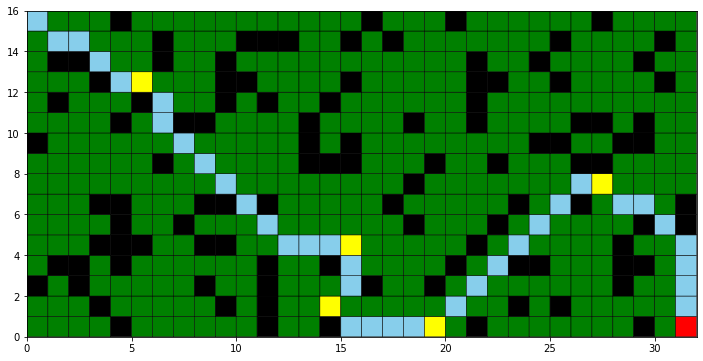

In [ ]:
def convertmapa2(x):
    fmap = []
    nmap = []
    cont = 0
    for j in range(aux.ancho):
      for i in range(aux.largo):
        cont+=1
        if x[j*aux.largo+i] == 'I':
          nmap.append(0)
        if x[j*aux.largo+i] == 'O':
          nmap.append(1)
        if x[j*aux.largo+i] == '.':
          nmap.append(2)
        if x[j*aux.largo+i] == 'X':
          nmap.append(3)
        if x[j*aux.largo+i] == 'F':
          nmap.append(4)
        if cont == aux.ancho:
          fmap.append(nmap)
          cont = 0
          nmap = []
    return fmap

mapaux = aux.l_mapaoriginal.copy()
for i in range(len(RutaFinal)):
  if i != 0 and i != RutaFinal[len(RutaFinal)-1] and mapaux[RutaFinal[i]] != 'O' and mapaux[RutaFinal[i]] != 'F':
    mapaux[RutaFinal[i]] = 'I'

Vermapa(convertmapa2(mapaux))

### Reproducción de ruta

In [ ]:
def tts(text_file, lang, name_file):
	with open(text_file, "r") as file:
		text = file.read()
	file = gTTS(text=text,lang=lang)
	filename = name_file
	file.save(filename)
 
def repruta(ruta):
  voice = []
  posini = ruta[0]
  for i in range(1,len(ruta)):  
    dista = ruta[i] - ruta[i-1]
    if ruta[i-1]+1 == ruta[i]:
      voice.append("east")
      continue
    if ruta[i-1]-1 == ruta[i]:
      voice.append("west")
      continue
    if ruta[i-1]+width == ruta[i]:
      voice.append("south")
      continue
    if ruta[i-1]-width == ruta[i]:
      voice.append("north")
      continue
    if ruta[i-1]-width-1 == ruta[i]:
      voice.append("northwest")
      continue
    if ruta[i-1]-width+1 == ruta[i]:
      voice.append("northeast")
      continue
    if ruta[i-1]+width-1 == ruta[i]:
      voice.append("southwest")
      continue
    if ruta[i-1]+width+1 == ruta[i]:
      voice.append("southeast")
      continue
  return voice    

def defrutablocks(voice):
  pasosvoice=""
  steps = 1
  for i in range(len(voice)-1):
    if voice[i] == voice[i+1]:
      steps +=1
    else:
      if steps == 1:
        pasosvoice += f" Move just one block to the {voice[i]},"
      else:
        pasosvoice += f" Move {steps} blocks to the {voice[i]},"
      steps=1
  if steps == 1:
    pasosvoice += f" Finally, Move just one block to the {voice[len(voice)-1]},"
  else:
    pasosvoice += f" Finally, move {steps} blocks to the {voice[len(voice)-1]},"
  return pasosvoice

def defrutameters(voice):
  pasosvoice=""
  steps = 1
  for i in range(len(voice)-1):
    if voice[i] == voice[i+1]:
      steps +=1
    else:
      if voice[i]=="north" or voice[i]=="south" or voice[i]=="east" or voice[i]=="west":
        pasosvoice += f" Move {(steps*10)} meters to the {voice[i]},"
      else:
        pasosvoice += f" Move {(steps*14)} meters to the {voice[i]},"
      steps=1
  if steps == 1:
    if voice[i]=="north" or voice[i]=="south" or voice[i]=="east" or voice[i]=="west":
      pasosvoice += f" Finally, Move just ten meters to the {voice[len(voice)-1]},"
    else:
      pasosvoice += f" Finally, Move just fourteen meters to the {voice[len(voice)-1]},"
  else:
    if voice[i]=="north" or voice[i]=="south" or voice[i]=="east" or voice[i]=="west":
      pasosvoice += f" Finally, move {(steps*10)} meters to the {voice[len(voice)-1]},"
    else:
      pasosvoice += f" Finally, move {(steps*14)} meters to the {voice[len(voice)-1]},"
  
  return pasosvoice

In [ ]:
ttst = gTTS(defrutablocks(repruta(RutaFinal)))
ttst.save('1.wav')
sound_file = '1.wav'
Audio(sound_file, autoplay=False)

In [ ]:
ttsm = gTTS(defrutameters(repruta(RutaFinal)))
ttsm.save('2.wav')
sound_file = '2.wav'
Audio(sound_file, autoplay=False)